In [59]:
import numpy as np
import time
# mport xgboost as xgb
import lightgbm as lgb
import catboost as cb
import ydf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from treeple.datasets import make_trunk_classification
import pandas as pd
import matplotlib.pyplot as plt



def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test):
    """
    Train a given model and evaluate its accuracy and training time.
    """
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    if isinstance(y_pred[0], np.ndarray):  # Some models return probabilities
        y_pred = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")
    
    return accuracy, train_time

def prepare_dataframe(X, y):
    df = pd.DataFrame(X)
    df.columns = [str(i) for i in df.columns]  # Convert column names to strings
    df["target"] = y.astype(int)  # Append target column

    return df

# XGBoost
https://xgboost.readthedocs.io/en/stable/tutorials/rf.html#standalone-random-forest-with-xgboost-api

# Catboost
https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier

# LightGBM
https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMClassifier.html

In [9]:


def multi_model_train(model, model_name, X_train, X_test, y_train, y_test, threshold=.5):
    """
    Train a given model and evaluate its accuracy and training time.
    """
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)

    y_pred = (y_pred >= threshold).astype(int) 

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")
      
    return accuracy, train_time

In [62]:
n_samples = 1000
n_dim = 10000
X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)


# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


MAX_DEPTH = 6
N_ESTIMATORS = 500
RANDOM_STATE = 42
N_REP = 5

params = {"device": "gpu",
        "gpu_platform_id": 0,
        "gpu_device_id": 0}

params["boosting_type"] = 'rf'
params["max_depth"] = MAX_DEPTH
params["random_state"] = RANDOM_STATE
params["bagging_freq"] = 1
params["bagging_fraction"] = 0.8
params["n_esimators"] = N_ESTIMATORS


In [63]:
total_accuracy = 0
total_time = 0
for _ in range(N_REP):
    lgbm_model = lgb.LGBMClassifier(**params)
    accuracy, train_time = train_and_evaluate(lgbm_model, 'lightGBM', X_train, X_test, y_train, y_test)
    total_accuracy += accuracy
    total_time += train_time
print(f"Average Accuracy = {total_accuracy / N_REP:.4f}, Average Training Time = {total_time / N_REP:.4f} sec")
print(f"Average training time = {total_time / N_REP:.4f} sec")


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10000
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10000
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10000 dense feature groups (7.63 MB) transferred to GPU in 0.074535 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> i

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10000
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10000 dense feature groups (7.63 MB) transferred to GPU in 0.078567 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> i

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
lightGBM: Accuracy = 0.7250, Training Time = 9.1658 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
lightGBM: Accuracy = 0.7250, Training Time = 9.1023 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [71]:
params_improved = params.copy()

# reduce feature and data sampling
params_improved["colsample_bytree"] = 0.5
params_improved["subsample"] = 0.5
params_improved["subsample_freq"] = 1

# control tree complexity
params_improved["num_leaves"] = 16
params_improved["max_depth"] = 10
params_improved["min_child_samples"] = 50

# reduce computational overhead
params_improved["subsample_for_bin"] = 100000
params_improved["min_split_gain"] = 0.2

# parallelism
params_improved["n_jobs"] = -1
params_improved["random_state"] = 42

# efficiency
params_improved["reg_alpha"] = 0.1
params_improved["reg_lambda"] = 0.1


In [65]:
total_accuracy = 0
total_time = 0
for _ in range(N_REP):
    lgbm_model = lgb.LGBMClassifier(**params_improved)
    accuracy, train_time = train_and_evaluate(lgbm_model, 'lightGBM', X_train, X_test, y_train, y_test)
    total_accuracy += accuracy
    total_time += train_time
print(f"Average Accuracy = {total_accuracy / N_REP:.4f}, Average Training Time = {total_time / N_REP:.4f} sec")
print(f"Average training time = {total_time / N_REP:.4f} sec")


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10000
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
lightGBM: Accuracy = 0.7650, Training Time = 5.8718 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
lightGBM: Accuracy = 0.7650, Training Time = 5.6056 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10000
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10000 dense feature groups (7.63 MB) transferred to GPU in 0.066494 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> i

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
lightGBM: Accuracy = 0.7650, Training Time = 5.6727 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# trunk simulation

compare lgbm, lgbm improved (all params), and ydf sporf

In [60]:

n_dims = [10, 50, 100, 200, 400, 800, 1600, 3200, 6400, 9600, 12800, 25600, 51200]

results = []
### ydf ###
params_ydf = dict()
params_ydf["label"] = "target"
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["num_trees"] = N_ESTIMATORS
params_ydf["random_seed"] = RANDOM_STATE
params_ydf["honest"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = True
params_ydf["categorical_algorithm"] = "ONE_HOT"
params_ydf["split_axis"] = "SPARSE_OBLIQUE"
params_ydf["compute_oob_performances"] = False
params_ydf["compute_oob_variable_importances"] = False
params_ydf["max_num_nodes"] = None
params_ydf["growing_strategy"] = "LOCAL"
params_ydf["sparse_oblique_weights"] = "CONTINUOUS"
params_ydf["sparse_oblique_projection_density_factor"] = 1.0
params_ydf["sparse_oblique_normalization"] = "MIN_MAX" ###
params_ydf["sparse_oblique_max_num_projections"] = 70 # modify this, find in sourse code in treeple


for n_dim in n_dims:
    print(f"\n--- Running Experiment with {n_dim} Dimensions ---")

    # Generate Data
    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- Train LightGBM ---
    lgbm_model = lgb.LGBMClassifier(**params)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM", X_train, X_test, y_train, y_test)

    results.append(["LightGBM", n_dim, acc_lgb, time_lgb])

    # --- Train LightGBM_improved ---
    lgbm_model = lgb.LGBMClassifier(**params_improved)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM_improved", X_train, X_test, y_train, y_test)

    results.append(["LightGBM_improved", n_dim, acc_lgb, time_lgb])

    # --- Train YDF for comparison---
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)
        
    learner = ydf.RandomForestLearner(**params_ydf)
    start_time = time.time()
    ydf_model = learner.train(df_train)
    time_ydf = time.time() - start_time
    y_pred = ydf_model.predict(df_test)
    y_pred = (y_pred >= 0.5).astype(int) 

    acc_ydf = accuracy_score(y_test, y_pred)
    results.append(["YDF", n_dim, acc_ydf, time_ydf])


# Convert results to a DataFrame and save
df_results = pd.DataFrame(results, columns=["Model", "n_dim", "Accuracy", "Training_Time"])
df_results.to_csv("./result/trunk_simulation_results_lightGBM.csv", index=False, mode="w")

print("\nResults saved to ./result/trunk_simulation_results.csv")


--- Running Experiment with 10 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [In

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 10. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.448240

--- Running Experiment with 50 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 50
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 50. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.489413

--- Running Experiment with 100 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 100
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.551281

--- Running Experiment with 200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.611791

--- Running Experiment with 400 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0


c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 400. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 400 dense feature groups (0.31 MB) transferred to GPU in 0.008169 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.807089

--- Running Experiment with 800 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 204000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 800
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendo

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 800 dense feature groups (0.61 MB) transferred to GPU in 0.010971 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.897452

--- Running Experiment with 1600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 408000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1600
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Ven

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 1.7672 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:01.379182

--- Running Experiment with 3200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 816000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 3200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Ven

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7400, Training Time = 2.9164 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:02.235240

--- Running Experiment with 6400 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1632000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Ve

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1632000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6400 dense feature groups (4.88 MB) transferred to GPU in 0.048610 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> ini

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7750, Training Time = 1.7483 sec
Train model on 800 examples
Model trained in 0:00:03.725231

--- Running Experiment with 9600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_fr

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2448000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9600
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 9600 dense feature groups (7.32 MB) transferred to GPU in 0.070253 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> ini

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:05.364191

--- Running Experiment with 12800 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3264000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12800
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Devic

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7250, Training Time = 10.9666 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7450, Training Time = 3.6547 sec
Train model on 800 examples
Model trained in 0:00:07.025386

--- Running Experiment with 25600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 22.7527 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7200, Training Time = 7.5060 sec
Train model on 800 examples
Model trained in 0:00:13.827824

--- Running Experiment with 51200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7150, Training Time = 47.0105 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7600, Training Time = 17.2959 sec
Train model on 800 examples
Model trained in 0:00:02.165776

Results saved to ./result/trunk_simulation_results.csv


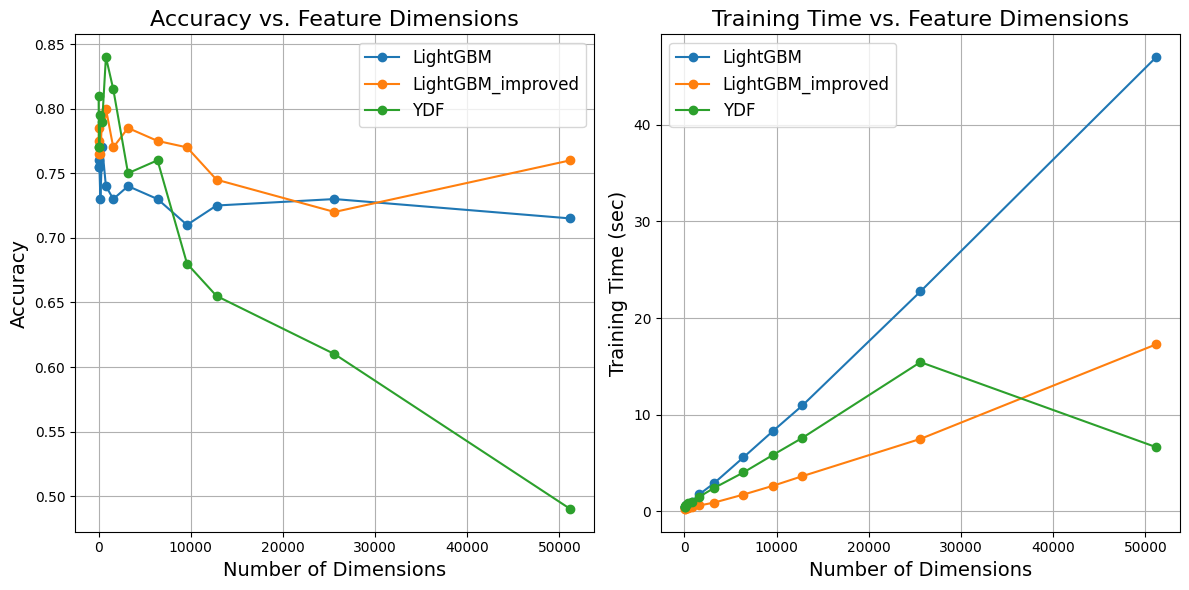

In [ ]:


# Define the file path
results_filepath = "./result/trunk_simulation_results_lightGBM.csv"

# Load the results file
df_results = pd.read_csv(results_filepath)

# Extract unique models and feature dimensions
models = df_results["Model"].unique()
n_dims = df_results["n_dim"].unique()

# Create figure for visualization
plt.figure(figsize=(12, 6))

# Plot Accuracy vs. Feature Dimensions
plt.subplot(1, 2, 1)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Accuracy"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Plot Training Time vs. Feature Dimensions
plt.subplot(1, 2, 2)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Training_Time"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Training Time (sec)", fontsize=14)
plt.title("Training Time vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


In [73]:
def train_and_evaluate_ydf(X_train, X_test, y_train, y_test, params_ydf):
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)
        
    learner = ydf.RandomForestLearner(**params_ydf)
    start_time = time.time()
    ydf_model = learner.train(df_train)
    time_ydf = time.time() - start_time
    y_pred = ydf_model.predict(df_test)
    y_pred = (y_pred >= 0.5).astype(int) 

    acc_ydf = accuracy_score(y_test, y_pred)
    return acc_ydf, time_ydf
#results.append(["YDF_SPORF(CPU)", n_dim, acc_ydf, time_ydf])

In [75]:
### ydf sporf###
params_ydf = dict()
params_ydf["label"] = "target"
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["num_trees"] = N_ESTIMATORS
params_ydf["random_seed"] = RANDOM_STATE
params_ydf["honest"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = True
params_ydf["categorical_algorithm"] = "ONE_HOT"
params_ydf["split_axis"] = "SPARSE_OBLIQUE"
params_ydf["compute_oob_performances"] = False
params_ydf["compute_oob_variable_importances"] = False
params_ydf["max_num_nodes"] = None
params_ydf["growing_strategy"] = "LOCAL"
params_ydf["sparse_oblique_weights"] = "CONTINUOUS"
params_ydf["sparse_oblique_projection_density_factor"] = 1.0
params_ydf["sparse_oblique_normalization"] = "MIN_MAX" ###
params_ydf["sparse_oblique_max_num_projections"] = 70 # modify this, find in sourse code in treeple

### ydf default rf ###
params_ydf_default = dict()
params_ydf_default["label"] = "target"
params_ydf_default["max_depth"] = MAX_DEPTH
params_ydf_default["num_trees"] = N_ESTIMATORS
params_ydf_default["random_seed"] = RANDOM_STATE


### lgbm gpu rf improved with subsample only ###
params_improved_subsample = params.copy()
params_improved_subsample["colsample_bytree"] = 0.5
params_improved_subsample["subsample"] = 0.5
params_improved_subsample["subsample_freq"] = 1

compare lgbm default, lgbm subsample, ydf default, and ydf sporf

In [ ]:

n_dims = [10, 50, 100, 200, 400, 800, 1600, 3200, 6400, 9600, 12800, 25600, 30000, 40000, 51200]

results = []


for n_dim in n_dims:
    print(f"\n--- Running Experiment with {n_dim} Dimensions ---")

    # Generate Data
    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- Train LightGBM ---
    lgbm_model = lgb.LGBMClassifier(**params)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM", X_train, X_test, y_train, y_test)

    results.append(["LightGBM_default (GPU)", n_dim, acc_lgb, time_lgb])

    # --- Train LightGBM_improved ---
    lgbm_model = lgb.LGBMClassifier(**params_improved)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM_improved", X_train, X_test, y_train, y_test)

    results.append(["LightGBM_improved (GPU)", n_dim, acc_lgb, time_lgb])

    # --- Train YDF sporf for comparison---
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)
        
    learner = ydf.RandomForestLearner(**params_ydf)
    start_time = time.time()
    ydf_model = learner.train(df_train)
    time_ydf = time.time() - start_time
    y_pred = ydf_model.predict(df_test)
    y_pred = (y_pred >= 0.5).astype(int) 

    acc_ydf = accuracy_score(y_test, y_pred)
    results.append(["YDF_SPORF(CPU)", n_dim, acc_ydf, time_ydf])

    # --- Train YDF default for comparison---
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)
        
    learner = ydf.RandomForestLearner(label="target", 
                                      max_depth=MAX_DEPTH, 
                                      num_trees=N_ESTIMATORS, 
                                      random_seed=RANDOM_STATE)
    start_time = time.time()
    ydf_model = learner.train(df_train)
    time_ydf = time.time() - start_time
    y_pred = ydf_model.predict(df_test)
    y_pred = (y_pred >= 0.5).astype(int) 

    acc_ydf = accuracy_score(y_test, y_pred)
    results.append(["YDF_default (CPU)", n_dim, acc_ydf, time_ydf])


# Convert results to a DataFrame and save
df_results = pd.DataFrame(results, columns=["Model", "n_dim", "Accuracy", "Training_Time"])
df_results.to_csv("./result/trunk_simulation_results_lightGBM2.csv", index=False, mode="w")

print("\nResults saved")


--- Running Experiment with 10 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [In

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 10. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7600, Training Time = 0.4274 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.380917
Train model on 800 examples
Model trained in 0:00:00.054008

--- Running Experiment with 50 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 50
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 50. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.464069
Train model on 800 examples
Model trained in 0:00:00.042413

--- Running Experiment with 100 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 100
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightG

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.512627
Train model on 800 examples
Model trained in 0:00:00.049330

--- Running Experiment with 200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightG

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 0.5425 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.611597
Train model on 800 examples
Model trained in 0:00:00.068514

--- Running Experiment with 400 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators


c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 400. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Lig

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.747127
Train model on 800 examples
Model trained in 0:00:00.091515

--- Running Experiment with 800 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 204000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 800
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Light

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] 800 dense feature groups (0.61 MB) transferred to GPU in 0.010795 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.971746
Train model on 800 examples
Model trained in 0:00:00.132510

--- Running Experiment with 1600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 408000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1600
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Lig

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 1600 dense feature groups (1.22 MB) transferred to GPU in 0.015318 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:01.359891
Train model on 800 examples
Model trained in 0:00:00.180915

--- Running Experiment with 3200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 816000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 3200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Lig

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 816000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 3200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3200 dense feature groups (2.44 MB) transferred to GPU in 0.025138 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> init

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:02.148416
Train model on 800 examples
Model trained in 0:00:00.284162

--- Running Experiment with 6400 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1632000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Li

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1632000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6400 dense feature groups (4.88 MB) transferred to GPU in 0.048015 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> ini

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:03.835876
Train model on 800 examples
Model trained in 0:00:00.467561

--- Running Experiment with 9600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2448000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9600
[LightGBM] [Info] Using requested Op

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2448000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9600
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 9600 dense feature groups (7.32 MB) transferred to GPU in 0.063504 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> ini

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7700, Training Time = 2.7637 sec
Train model on 800 examples
Model trained in 0:00:05.449973
Train model on 800 examples
Model trained in 0:00:00.668116

--- Running Experiment with 12800 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7250, Training Time = 11.0336 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:07.110994
Train model on 800 examples
Model trained in 0:00:00.839391

--- Running Experiment with 25600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 6528000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 25600
[LightGBM] [Info] Using requested 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 22.6105 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:14.902533
Train model on 800 examples
Model trained in 0:00:01.673200

--- Running Experiment with 30000 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7650000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 30000
[LightGBM] [Info] Using requested 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 28.7301 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7500, Training Time = 9.9172 sec
Train model on 800 examples
Model trained in 0:00:16.870878
Train model on 800 examples
Model trained in 0:00:02.089503

--- Running Experiment with 40000 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7200, Training Time = 38.0624 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7750, Training Time = 14.2780 sec
Train model on 800 examples
Model trained in 0:00:21.193898
Train model on 800 examples
Model trained in 0:00:02.605867

--- Running Experiment with 51200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7150, Training Time = 48.6614 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7600, Training Time = 18.7513 sec
Train model on 800 examples
Model trained in 0:00:02.339239
Train model on 800 examples
Model trained in 0:00:03.301099

Results saved


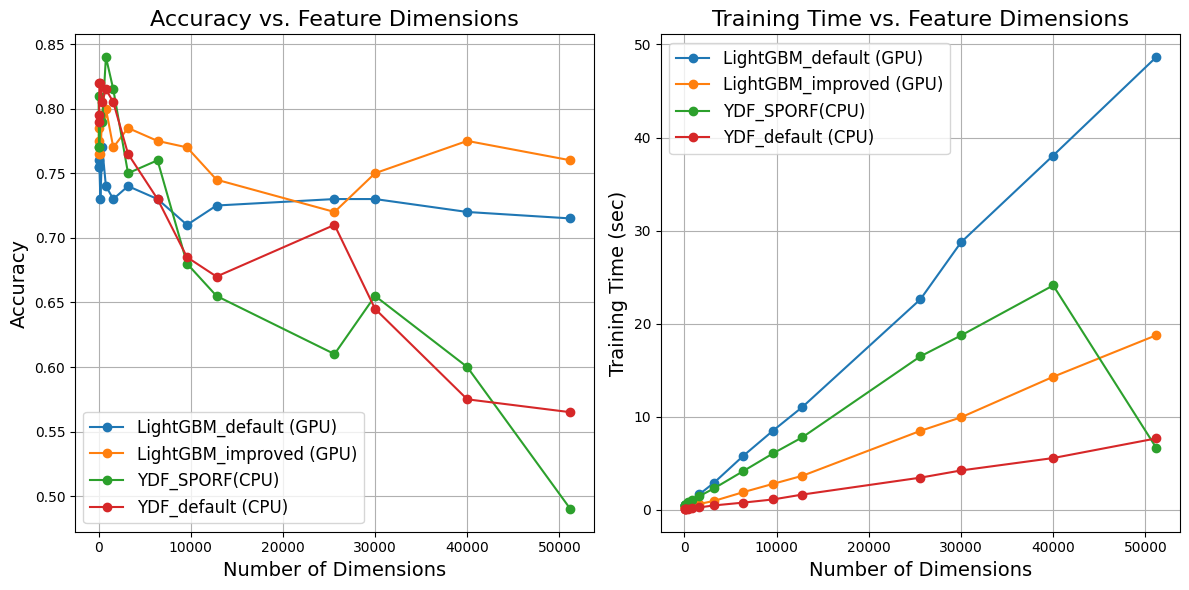

In [74]:


# Define the file path
results_filepath = "./result/trunk_simulation_results_lightGBM2.csv"

# Load the results file
df_results = pd.read_csv(results_filepath)

# Extract unique models and feature dimensions
models = df_results["Model"].unique()
n_dims = df_results["n_dim"].unique()

# Create figure for visualization
plt.figure(figsize=(12, 6))

# Plot Accuracy vs. Feature Dimensions
plt.subplot(1, 2, 1)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Accuracy"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Plot Training Time vs. Feature Dimensions
plt.subplot(1, 2, 2)
for model in models:
    subset = df_results[df_results["Model"] == model]
    plt.plot(subset["n_dim"], subset["Training_Time"], marker='o', label=model)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Training Time (sec)", fontsize=14)
plt.title("Training Time vs. Feature Dimensions", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


compare lgbm default, lgbm subsample, lgbm improved (all), ydf default, and ydf sporf, saved in result 3

In [ ]:

def plot_result(result_filepath):


    # Load the results file
    df_results = pd.read_csv(results_filepath)

    # Extract unique models and feature dimensions
    models = df_results["Model"].unique()
    n_dims = df_results["n_dim"].unique()

    # Create figure for visualization
    plt.figure(figsize=(12, 6))

    # Plot Accuracy vs. Feature Dimensions
    plt.subplot(1, 2, 1)
    for model in models:
        subset = df_results[df_results["Model"] == model]
        plt.plot(subset["n_dim"], subset["Accuracy"], marker='o', label=model)
    plt.xlabel("Number of Dimensions", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.title("Accuracy vs. Feature Dimensions", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot Training Time vs. Feature Dimensions
    plt.subplot(1, 2, 2)
    for model in models:
        subset = df_results[df_results["Model"] == model]
        plt.plot(subset["n_dim"], subset["Training_Time"], marker='o', label=model)
    plt.xlabel("Number of Dimensions", fontsize=14)
    plt.ylabel("Training Time (sec)", fontsize=14)
    plt.title("Training Time vs. Feature Dimensions", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Define the file path
results_filepath = "./result/trunk_simulation_results_lightGBM3.csv"
plot_result(results_filepath)

In [ ]:

n_dims = [10, 50, 100, 200, 400, 800, 1600, 3200, 6400, 9600, 12800, 25600, 30000, 40000, 51200]

results = []


for n_dim in n_dims:
    print(f"\n--- Running Experiment with {n_dim} Dimensions ---")

    # Generate Data
    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- Train LightGBM ---
    lgbm_model = lgb.LGBMClassifier(**params)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM", X_train, X_test, y_train, y_test)

    results.append(["LightGBM_default (GPU)", n_dim, acc_lgb, time_lgb])

    # --- Train LightGBM_improved with subsampling only ---
    lgbm_model = lgb.LGBMClassifier(**params_improved_subsample)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM", X_train, X_test, y_train, y_test)

    results.append(["LightGBM_subsample (GPU)", n_dim, acc_lgb, time_lgb])


    # --- Train LightGBM_improved ---
    lgbm_model = lgb.LGBMClassifier(**params_improved)
    acc_lgb, time_lgb = multi_model_train(lgbm_model, "LightGBM_improved", X_train, X_test, y_train, y_test)

    results.append(["LightGBM_improved (GPU)", n_dim, acc_lgb, time_lgb])

    # --- Train YDF sporf for comparison---
    acc_ydf, time_ydf = train_and_evaluate_ydf(X_train, X_test, y_train, y_test, params_ydf)
    results.append(["YDF_SPORF(CPU)", n_dim, acc_ydf, time_ydf])

    # --- Train YDF default for comparison---
    acc_ydf, time_ydf = train_and_evaluate_ydf(X_train, X_test, y_train, y_test, params_ydf_default)
    results.append(["YDF_default (CPU)", n_dim, acc_ydf, time_ydf])



# Convert results to a DataFrame and save
df_results = pd.DataFrame(results, columns=["Model", "n_dim", "Accuracy", "Training_Time"])
df_results.to_csv("./result/trunk_simulation_results_lightGBM3.csv", index=False, mode="w")

print("\nResults saved")


--- Running Experiment with 10 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [In

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 10. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7600, Training Time = 0.4295 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7500, Training Time = 0.4354 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.420569
Train model on 800 examples
Model trained in 0:00:00.032999

--- Running Experiment with 50 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 50
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 50. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.482988
Train model on 800 examples
Model trained in 0:00:00.052515

--- Running Experiment with 100 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 100
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightG

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (0.08 MB) transferred to GPU in 0.005838 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.496557
Train model on 800 examples
Model trained in 0:00:00.053001

--- Running Experiment with 200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightG

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 200 dense feature groups (0.15 MB) transferred to GPU in 0.006052 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.623596
Train model on 800 examples
Model trained in 0:00:00.072515

--- Running Experiment with 400 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators


c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 400. Setting n_informative to n_dim.
  warnings.warn(


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Lig

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.684583
Train model on 800 examples
Model trained in 0:00:00.090914

--- Running Experiment with 800 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 204000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 800
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Light

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7900, Training Time = 0.7941 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:00.926782
Train model on 800 examples
Model trained in 0:00:00.131301

--- Running Experiment with 1600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 408000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1600
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Lig

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 1600 dense feature groups (1.22 MB) transferred to GPU in 0.014882 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 1600 dense feature groups (1.22 MB) transferred to GPU in 0.015918 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:01.345016
Train model on 800 examples
Model trained in 0:00:00.177514

--- Running Experiment with 3200 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 816000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 3200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Lig

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 816000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 3200
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3200 dense feature groups (2.44 MB) transferred to GPU in 0.024338 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> init

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3200 dense feature groups (2.44 MB) transferred to GPU in 0.024674 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model trained in 0:00:02.155811
Train model on 800 examples
Model trained in 0:00:00.283407

--- Running Experiment with 6400 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1632000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6400
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[Li

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 5.5829 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7850, Training Time = 3.6258 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:03.856274
Train model on 800 examples
Model trained in 0:00:00.455050

--- Running Experiment with 9600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2448000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9600
[LightGBM] [Info] Using requested Op

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7100, Training Time = 8.3355 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2448000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9600
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 9600 dense feature groups (7.32 MB) transferred to GPU in 0.065744 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> ini

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:05.711202
Train model on 800 examples
Model trained in 0:00:00.627500

--- Running Experiment with 12800 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3264000
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 12800
[LightGBM] [Info] Using requested 

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7250, Training Time = 11.0177 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7200, Training Time = 7.0554 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[L

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7450, Training Time = 3.6748 sec
Train model on 800 examples
Model trained in 0:00:07.117029
Train model on 800 examples
Model trained in 0:00:00.912669

--- Running Experiment with 25600 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 23.4054 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 15.1094 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7200, Training Time = 8.2682 sec
Train model on 800 examples
Model trained in 0:00:14.283492
Train model on 800 examples
Model trained in 0:00:01.664139

--- Running Experiment with 30000 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 29.4787 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7500, Training Time = 18.0668 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7500, Training Time = 9.7388 sec
Train model on 800 examples
Model trained in 0:00:17.051198
Train model on 800 examples
Model trained in 0:00:01.996128

--- Running Experiment with 40000 Dimensions ---
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7200, Training Time = 37.9236 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM: Accuracy = 0.7300, Training Time = 25.5561 sec
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] This is the GPU trainer!!
[

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.5 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
LightGBM_improved: Accuracy = 0.7750, Training Time = 13.5764 sec
Train model on 800 examples
